<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/cats_vs_dogs_simple_apply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: Operation cancelled by user


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.1A0N6T_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


582/582 ━━━━━━━━━━━━━━━━━━━━ 635s 1s/step - accuracy: 0.5798 - loss: 0.6925 - val_accuracy: 0.7132 - val_loss: 0.5613
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 724s 1s/step - accuracy: 0.7435 - loss: 0.5200 - val_accuracy: 0.7900 - val_loss: 0.4439
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.7995 - loss: 0.4304 - val_accuracy: 0.7908 - val_loss: 0.4394
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.8371 - loss: 0.3629 - val_accuracy: 0.8162 - val_loss: 0.4021
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 684s 1s/step - accuracy: 0.8736 - loss: 0.2924 - val_accuracy: 0.8160 - val_loss: 0.4158


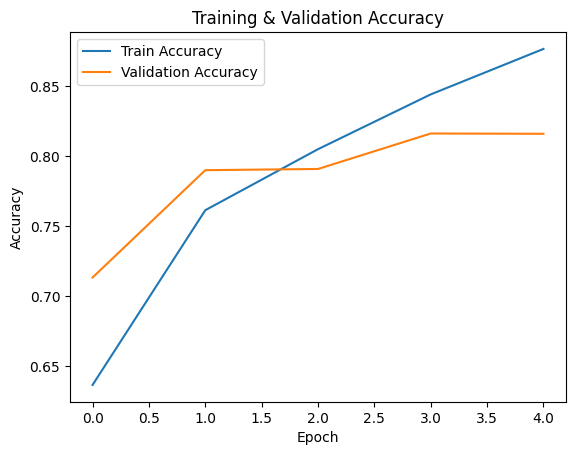

In [ ]:
# Step 1: Install TensorFlow Datasets
#!pip install tensorflow-datasets

# ✅ Step 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Step 3: Load and Split the Dataset
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Step 4: Preprocess Images
IMG_SIZE = 128

def format_img(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(format_img).batch(32).prefetch(1)
val_ds = val_ds.map(format_img).batch(32).prefetch(1)

#  Step 5: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Step 6: Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 7: Train the Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# Step 8: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()
